Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others as "Good".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment15_RandomForest/Fraud_Check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Exploratory Data Anaysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


#### Undergrad, Marital.Status and Urban are categorical data and will need to be changed into numerics (coded).

#### Let's check for missing data as well.

In [4]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

#### No missing data.

In [5]:
#Check for columns
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
#Check unique values of categorical variables

df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
#Get dummies for categorical variables
df = pd.get_dummies(df)

In [10]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [11]:
# Converting the Target variable i.e. Taxable Income to Categorical Variable (As per the problem statement)
# df['Category'] = pd.cut(df['Taxable.Income'],bins=[0,30000, np.inf], labels=['Risky','Good'],include_lowest=True)

In [12]:
df['Fraud'] = np.where(df['Taxable.Income']<=30000, 1,0) #Risky is 1 and Good is 0
df.head(25)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Fraud
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
5,33329,116382,0,1,0,1,0,0,1,0,0
6,83357,80890,8,1,0,1,0,0,0,1,0
7,62774,131253,3,0,1,0,0,1,0,1,0
8,83519,102481,12,1,0,0,0,1,0,1,0
9,98152,155482,4,0,1,1,0,0,0,1,0


In [13]:
#Check for columns
df.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'Fraud'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   Undergrad_NO             600 non-null    uint8
 4   Undergrad_YES            600 non-null    uint8
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
 8   Urban_NO                 600 non-null    uint8
 9   Urban_YES                600 non-null    uint8
 10  Fraud                    600 non-null    int32
dtypes: int32(1), int64(3), uint8(7)
memory usage: 20.6 KB


In [15]:
columnnames = list(df.columns)
columnnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'Fraud']

In [16]:
predictors = columnnames[:-1]
target = columnnames[-1]

In [17]:
X = df[predictors]
Y = df[target]

In [18]:
X

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [19]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraud, Length: 600, dtype: int32

In [20]:
rf = RandomForestClassifier( n_estimators=10,
    criterion='entropy',oob_score=False)
rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [21]:
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
df['rf_pred'] = rf.predict(X)
cols = ['rf_pred','Fraud']
df[cols].head(25)

,rf_pred,Fraud
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [23]:
confusion_matrix(df['Fraud'],df['rf_pred'])

array([[476,   0],
       [  0, 124]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(df['Fraud'],df['rf_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       124

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



#### We can see that the scores are pretty high and accuracy is 100%.

#### Let's see how can we visualize the fraud detection.

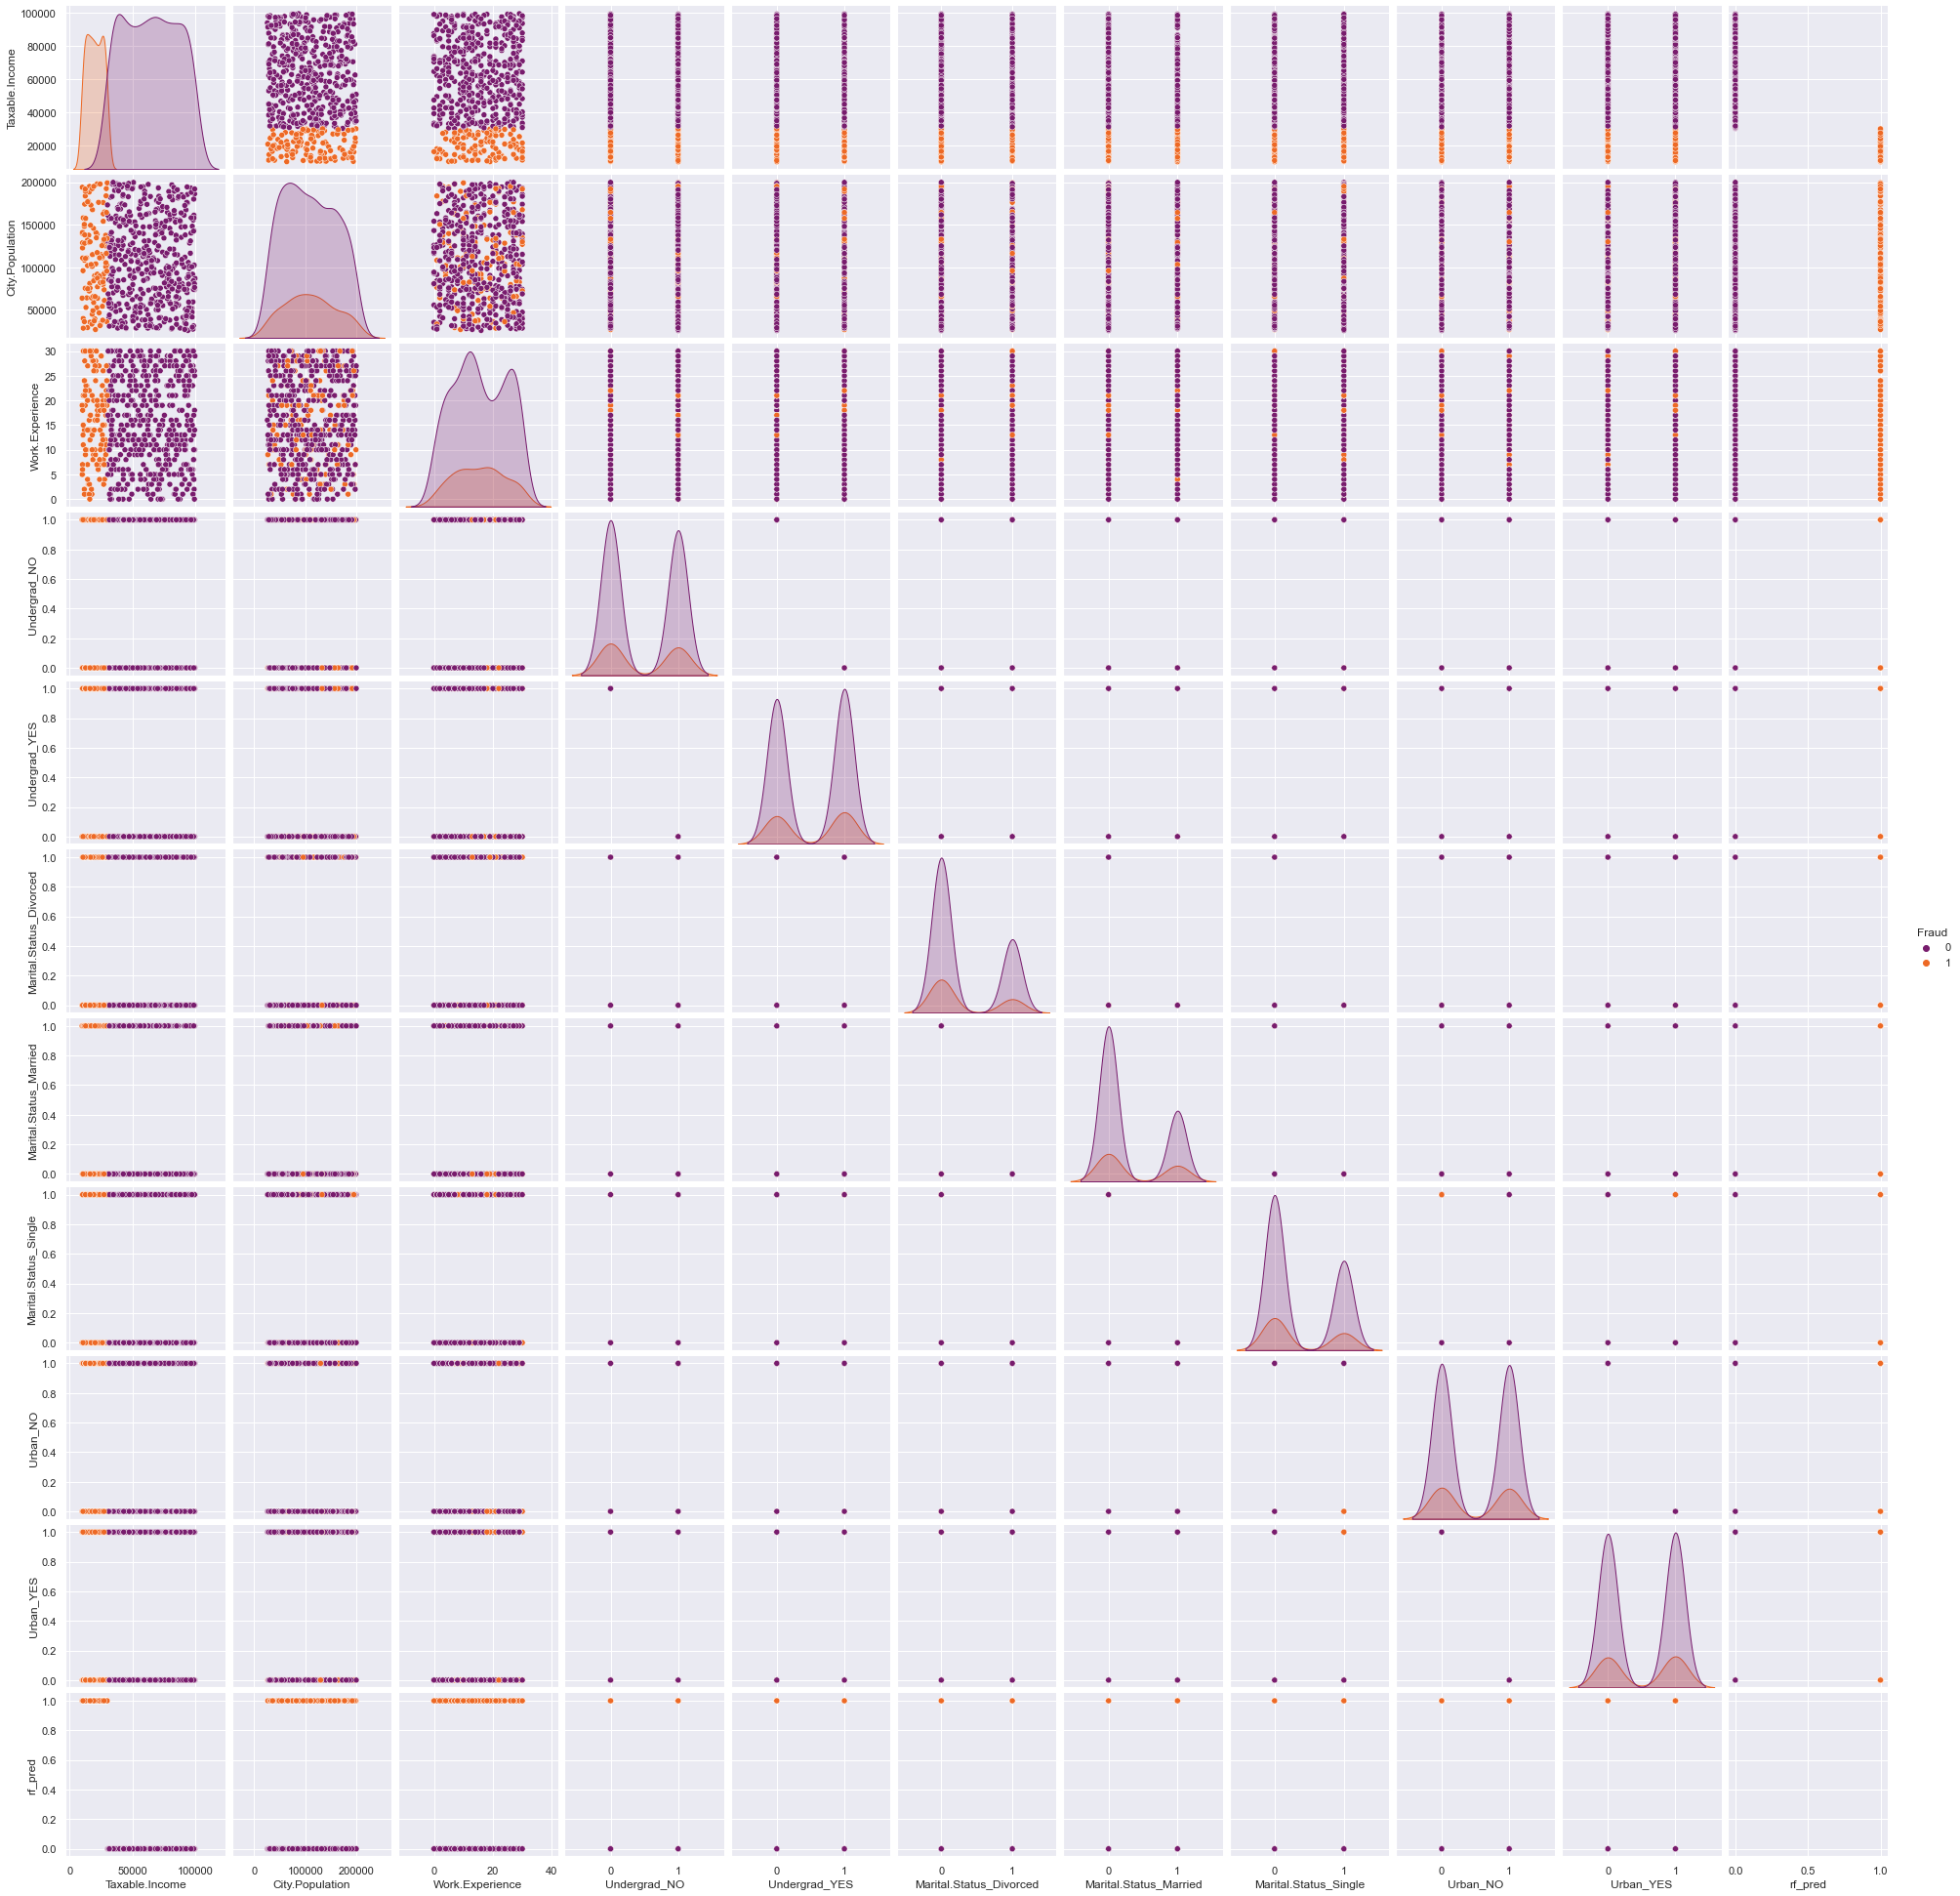

In [25]:
sns.pairplot(df,hue='Fraud',palette='inferno')

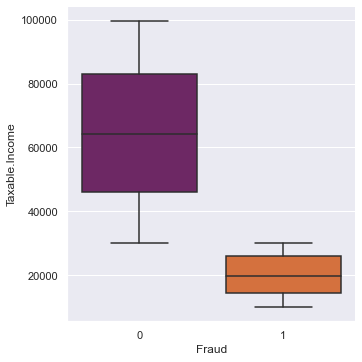

In [26]:
sns.catplot(x='Fraud',y='Taxable.Income',data=df,kind='box',palette='inferno')

#### 0 is Good and 1 is risky in the plot above. There's no overlap between the two box plots i.e there's clear relationship between income and fraud behavhiour.

In [27]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9983333333333334


### Train-Test Split Method

In [28]:
pdata=df.copy()

In [29]:
pdata.head(2)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Fraud,rf_pred
0,68833,50047,10,1,0,0,0,1,0,1,0,0
1,33700,134075,18,0,1,1,0,0,0,1,0,0


In [30]:
x=pdata.iloc[:,0:-1]
y=pdata['rf_pred']

In [31]:
y.value_counts()

0    476
1    124
Name: rf_pred, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [34]:
base_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [36]:
confusion_matrix(y_test,base_pred)

array([[94,  0],
       [ 0, 26]], dtype=int64)

#### This looks good. We'll see other CV improvement methods.

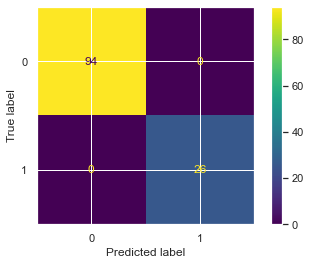

In [37]:
plot_confusion_matrix(model,x_test,y_test)

In [38]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

1.0


#### K Fold Cross Validation

In [39]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
modelc = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(modelc, X, Y, cv=kfold)
print(results.mean())

0.9983333333333334


#### Bagging

In [40]:
modeld=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [41]:
from sklearn.ensemble import BaggingClassifier
modeld=BaggingClassifier(base_estimator=modeld)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

1.0


#### Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
modele=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(modele,x,y,cv=kfold)
print(results.mean())

1.0


#### LGBM

In [43]:
!pip install lightgbm

In [44]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [45]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [46]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [47]:
#Prediction
y_pred=clf.predict(x_test)

In [48]:
predictions = [round(value) for value in y_pred]

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7833333333333333

#### XGBM

In [50]:
!pip install xgboost

In [51]:
#  XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
xgmodel = XGBClassifier(eval_metric='mlogloss')
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [54]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [55]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


### Need to understand this better as LGBM accuracy is 78% while XGBM accuracy is 100%.